In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from simulation import data
import pandas
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

In [2]:
from player_dicts import *


In [3]:
#get player data from result page
DATA = data.parse(PLAYER_ID)

|==============================| 100% | Done!


In [4]:
#define the lanes for the CUP system
lanes_e = [ 'E'+str(i) for i in [1,3,4,5,12,13,14,16,17 ]]
lanes_f = [ 'F'+str(i) for i in [2,4,7,8,12,13,15,17,18]]
LANES = [*lanes_e,*lanes_f]
LANES_ALL = [*[ 'E'+str(i+1) for i in range(18)],
             *[ 'F'+str(i+1) for i in range(18)]]
print(LANES_ALL)

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18']


In [6]:
from simulation.matchplay import gen_Cup_16
from simulation.matchplay import gen_Cup_32
#MC simulation
n_MC = 10000
medals_w = [x.medals for x in gen_Cup_16(RANK_W,DATA,LANES,n_MC) ]
medals_m = [x.medals for x in gen_Cup_32(RANK_M,DATA,LANES,n_MC) ]

In [7]:
#Plot function for the most common winners
def plot_most_common(medals,n_top=10):
    winners = [x[0] for x in medals]
    letter_counts = Counter(winners)
    dtf = pandas.Series(OrderedDict(letter_counts.most_common(n_top))).plot(kind='bar')
    return dtf

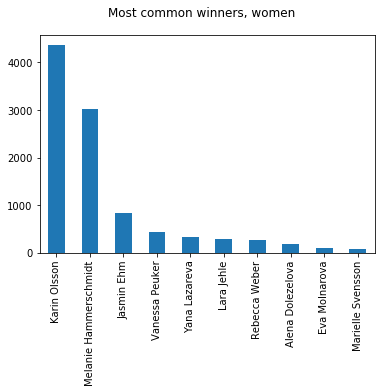

In [242]:
dtf = plot_most_common(medals_w)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Most common winners, women')
fig.savefig('../FIG/winners_w',bbox_inches = 'tight')



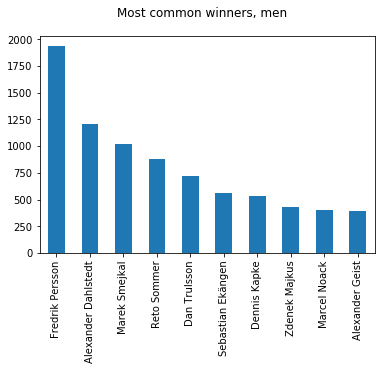

In [243]:
dtf = plot_most_common(medals_m)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Most common winners, men')
fig.savefig('../FIG/winners_m',bbox_inches = 'tight')

In [10]:
from simulation.game import Game_lanelog
score = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES).score
lanelog  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES).lanelog
print(score)
print(lanelog)

[5, 1]
[-1, 0, 0, -1, 0, 1, -1, -1, -1, 0, 1, 1, 1, 0, 1, 1, 0, 0]


In [24]:
from simulation.matchfuncs import getRandom
from simulation.matchfuncs import getMean
lanelog  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES_ALL,getRandom).lanelog
print(lanelog)
lanelog  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES_ALL,getRandom).lanelog
print(lanelog)

[-1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, -1, -1, -1, 0, 1, 0, 0, 0, 0, -1, 1, 1, -1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, -1, -1, -1, -1, 0, 1, 0, -1, 0, -1, 1, 0, 0, 1, 0, 0, 0]


In [23]:
from simulation.matchfuncs import getRandom
from simulation.matchfuncs import getMean
lanelog  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES_ALL,getMean).lanelog
print(lanelog)
lanelog  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES_ALL,getMean).lanelog
print(lanelog)

[0, 0, 0, 0, -1, 0, -1, 0, 1, 0, 0, -1, 1, 1, -1, -1, 0, 0, 0, -1, -1, 1, 0, 1, 0, 1, -1, -1, 0, 1, 1, 1, 1, -1, -1, 0]
[0, 0, 0, 0, -1, 0, -1, 0, 1, 0, 0, -1, 1, 1, -1, -1, 0, 0, 0, -1, -1, 1, 0, 1, 0, 1, -1, -1, 0, 1, 1, 1, 1, -1, -1, 0]


In [28]:
def getresdict(lanes):
    resdict = dict()
    for lane in lanes:
        resdict[lane] = 0
    return resdict
    
def addGame(p1,p2,lanes, resdict,resfunc):
    for i,el in enumerate( Game_lanelog(p1,p2,'E1',DATA,lanes,resfunc).lanelog):
        resdict[lanes[i]] = resdict[lanes[i]] + el 
    return resdict
    
import operator                             #Importing operator module
def plotSortedLanes(res_all):
    dc_sort = sorted(res_all.items(),key = operator.itemgetter(1),reverse = True)
    keys = [v[0] for v in dc_sort]
    vals = [v[1] for v in dc_sort]

    plt.figure(figsize=(13,5))
    barlist = plt.bar(range(len(vals)), vals, align='center')
    plt.xticks(range(len(vals)), keys)
    for i,el in enumerate(keys):
        try:
            LANES.index(el)
            barlist[i].set_color('r')
        except:
            pass
        

In [31]:
import numpy as np
names_m = [v for v in RANK_M.values()]
names_w = [v for v in RANK_W.values()]
np.random.choice(names_m)

'Sebastian Piekorz'

In [79]:
def plotHighestScores(scores,lambda_f, n_plot):
    top_dict = OrderedDict()
    for el in sorted(scores.items(),
                     key = lambda_f,reverse = True)[:10]:
        top_dict[el[0]] = lambda_f(el)
    dtf = pandas.Series(top_dict).plot(kind='bar')
    return dtf

def get_lane_scores_mean(p1,names):
    res_all = getresdict(LANES_ALL)
    match_count = 0
    for p2 in names:
        if (p1 != p2):
            match_count = match_count+1
            res_all = addGame(p1,p2,LANES_ALL,res_all,getMean)
    return res_all, match_count

def get_lane_scores_mc(p1,names):
    res_all = getresdict(LANES_ALL)
    match_count = 0
    for _ in range(1000):
        p2 = np.random.choice(names)
        if (p1 != p2):
            match_count = match_count+1
            res_all = addGame(p1,p2,LANES_ALL,res_all,getRandom)
    return res_all,match_count
    

def getnormscoresdict(names):
    norm_scores = dict()
    for n in names:
        lane_scores = get_lane_scores(n,names)
        norm_scores[n] = (get_normalized_score(lane_scores,LANES), 
                          get_normalized_score(lane_scores,LANES_ALL) )
    
        print(n,norm_scores[n])
    return norm_scores

In [80]:
def get_normalized_score(result, lanes):
    count = 0
    score = 0
    for el in lanes:
        #print(el)
        count = count + abs(result[el])
        score = score + result[el]
    return (score/count)

def score_from_lanes(scores):
    return (np.sum(np.array(scores)>0),
            np.sum(np.array(scores)<0))


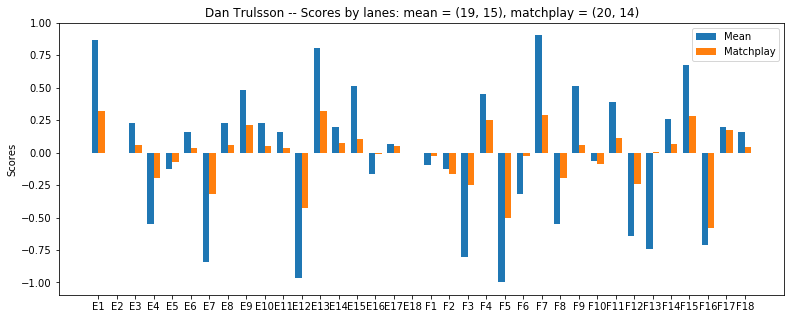

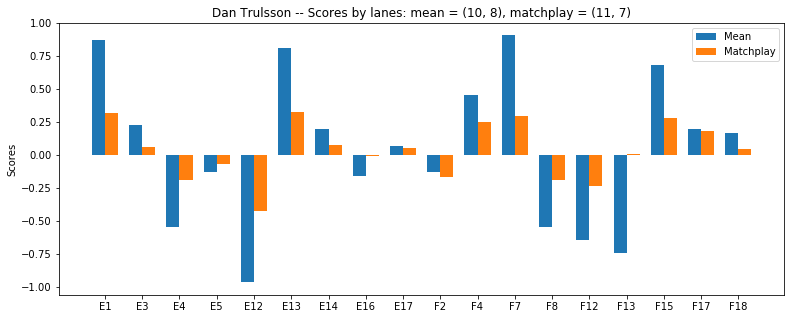

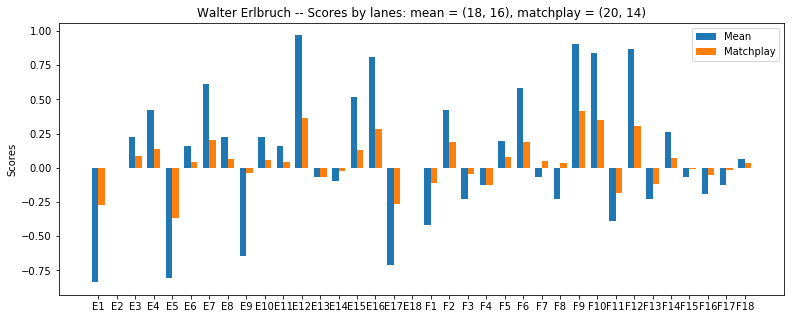

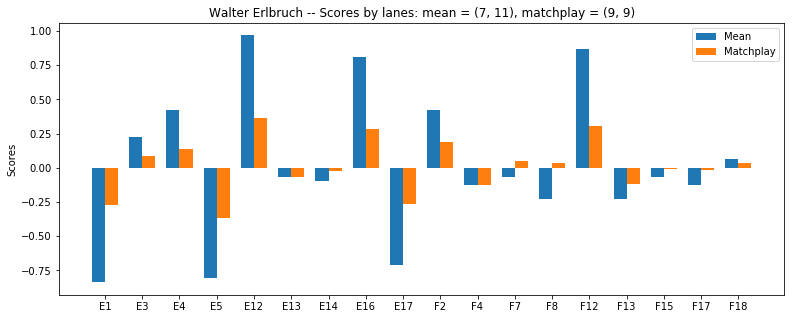

In [167]:
def plotLaneBarPlot(res_mean, count_mean,
                    res_mc, count_mc,
                    p1,lanes):
    ind = np.arange(len(lanes))  # the x locations for the groups
    bins_mean = [ res_mean[l]/count_mean for l in lanes]
    bins_mc = [ res_mc[l]/count_mc for l in lanes]

    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(13)
    rects1 = ax.bar(ind, bins_mean, width)
    rects2 = ax.bar(ind + width, bins_mc, width)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Scores')
    ax.set_title('{} -- Scores by lanes: mean = {}, matchplay = {}'.
                format(p1,score_from_lanes(bins_mean),
                       score_from_lanes(bins_mc)))
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(lanes)

    ax.legend((rects1[0], rects2[0]), ('Mean', 'Matchplay'))

    
    plt.show()
    return fig

def plotLaneBarPlots(p1,names):
    res_mean, count_mean = get_lane_scores_mean(p1, names)
    res_mc, count_mc = get_lane_scores_mc(p1, names)
    
    fig = plotLaneBarPlot(res_mean, count_mean,
                    res_mc, count_mc,
                    p1,LANES_ALL)
    fig.savefig('../FIG/lanes_all_{}'.format(p1.lower().replace(" ", "_")),bbox_inches = 'tight')  
    
    fig = plotLaneBarPlot(res_mean, count_mean,
                    res_mc, count_mc,
                    p1,LANES)
    
    fig.savefig('../FIG/lanes_cup_{}'.format(p1.lower().replace(" ", "_")),bbox_inches = 'tight')

        

    

p1 = 'Dan Trulsson'
plotLaneBarPlots(p1,names_m)
p1 = 'Walter Erlbruch'
plotLaneBarPlots(p1,names_m)



In [162]:
p1.lower().replace(" ", "_")

'walter_erlbruch'

In [96]:
print(sum(bins_mean))
print(sum(bins_mc))

-0.22580645161290316
-0.31752577319587644


In [39]:
#norm_scores_w = getnormscoresdict(names_w)
#norm_scores_m = getnormscoresdict(names_m)

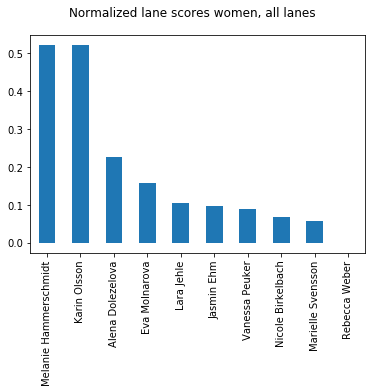

In [310]:
dtf = plotHighestScores(norm_scores_w,lambda x: x[1][1], 10)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores women, all lanes')
fig.savefig('../FIG/lanescores_w_all',bbox_inches = 'tight')

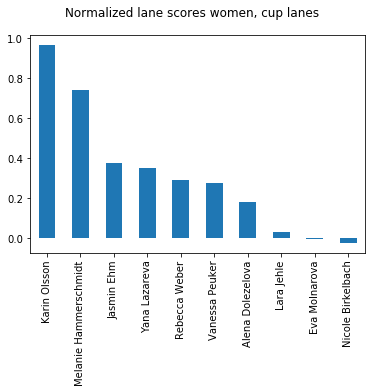

In [311]:
dtf = plotHighestScores(norm_scores_w,lambda x: x[1][0], 10)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores women, cup lanes')
fig.savefig('../FIG/lanescores_w_cup',bbox_inches = 'tight')

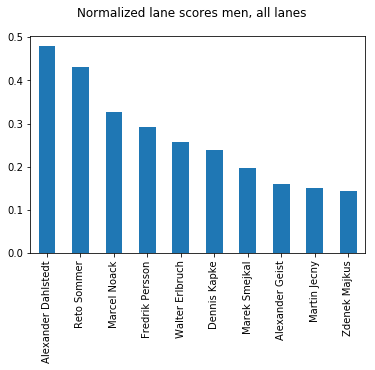

In [312]:
dtf = plotHighestScores(norm_scores_m,lambda x: x[1][1], 10)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores men, all lanes')
fig.savefig('../FIG/lanescores_m_all',bbox_inches = 'tight')

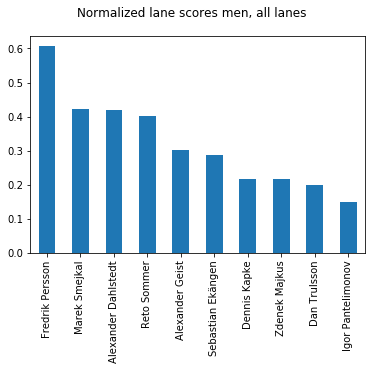

In [313]:
dtf = plotHighestScores(norm_scores_m,lambda x: x[1][0], 10)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores men, all lanes')
fig.savefig('../FIG/lanescores_m_cup',bbox_inches = 'tight')

In [ ]:
def plotEndsScores(scores,lambda_f, n_plot):
    top_dict = OrderedDict()
    sorted_scores = sorted(scores.items(),
                     key = lambda_f,reverse = True)
    for el in sorted_scores[:n_plot]+sorted_scores[-n_plot:]:
        top_dict[el[0]] = lambda_f(el)
    dtf = pandas.Series(top_dict).plot(kind='bar')
    return dtf

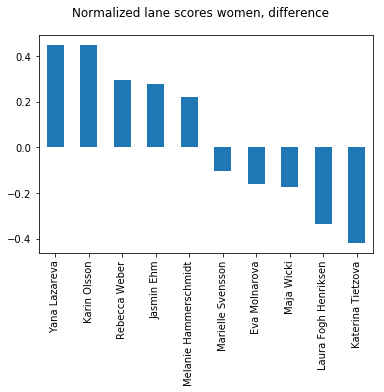

In [329]:
dtf = plotEndsScores(norm_scores_w,lambda x: x[1][0]-x[1][1], 5)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores women, difference')
fig.savefig('../FIG/lanescores_w_diff',bbox_inches = 'tight')

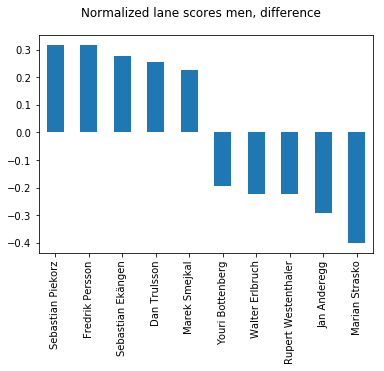

In [327]:
dtf = plotEndsScores(norm_scores_m,lambda x: x[1][0]-x[1][1], 5)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores men, difference')
fig.savefig('../FIG/lanescores_m_diff',bbox_inches = 'tight')

In [323]:
x = [x for x in range(10)]
print(x)
print(x[:3])
print(x[:3]+x[-3:])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2]
[0, 1, 2, 7, 8, 9]


0.6111731843575419
0.29573984776630935


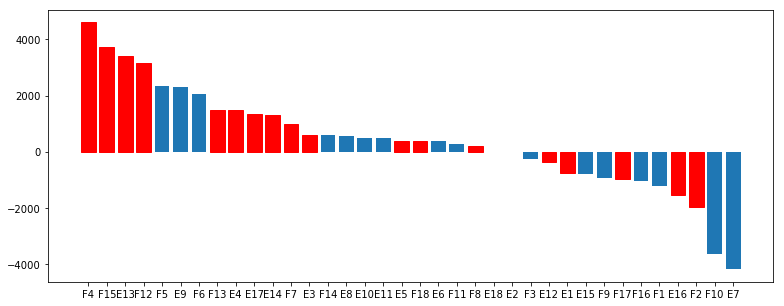

In [232]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Fredrik Persson'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

0.2288929361259269
-0.051334629031970475


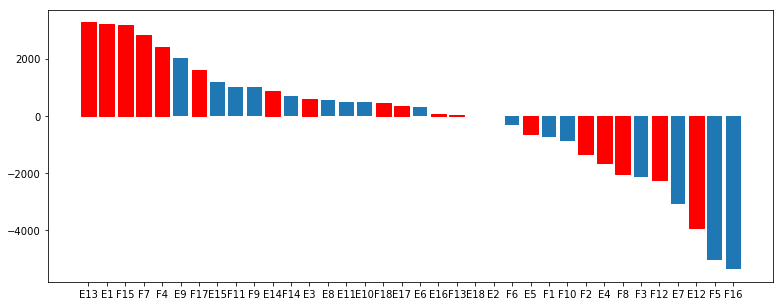

In [233]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Dan Trulsson'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

0.41559009420837145
0.19804622133779567


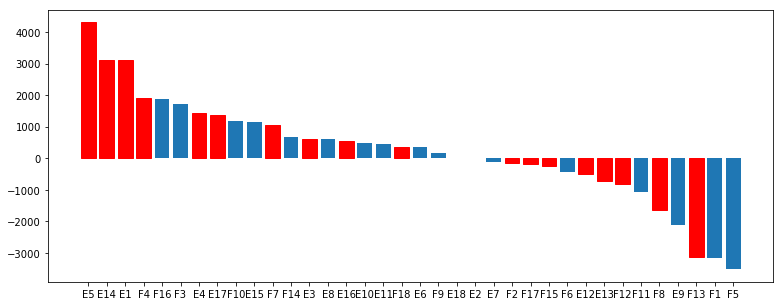

In [234]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Marek Smejkal'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

-0.1294559099437148
-0.014637656460073093


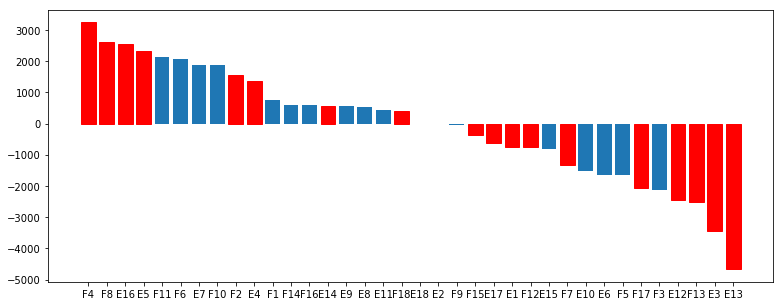

In [235]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Christian Gobetz'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

In [173]:
Counter(medals_m).most_common(10)
    

[(('Fredrik Persson', 'Reto Sommer', 'Alexander Dahlstedt'), 57),
 (('Fredrik Persson', 'Dan Trulsson', 'Alexander Dahlstedt'), 52),
 (('Fredrik Persson', 'Dennis Kapke', 'Alexander Dahlstedt'), 50),
 (('Fredrik Persson', 'Sebastian Ekängen', 'Alexander Dahlstedt'), 49),
 (('Alexander Dahlstedt', 'Marek Smejkal', 'Fredrik Persson'), 48),
 (('Reto Sommer', 'Fredrik Persson', 'Alexander Dahlstedt'), 47),
 (('Fredrik Persson', 'Ondrej Skaloud', 'Alexander Dahlstedt'), 44),
 (('Fredrik Persson', 'Marek Smejkal', 'Dan Trulsson'), 43),
 (('Fredrik Persson', 'Marek Smejkal', 'Alexander Dahlstedt'), 43),
 (('Marek Smejkal', 'Fredrik Persson', 'Alexander Dahlstedt'), 41)]

In [174]:
Counter(medals_w).most_common(10)

[(('Melanie Hammerschmidt', 'Karin Olsson', 'Jasmin Ehm'), 575),
 (('Karin Olsson', 'Melanie Hammerschmidt', 'Jasmin Ehm'), 506),
 (('Melanie Hammerschmidt', 'Jasmin Ehm', 'Karin Olsson'), 406),
 (('Melanie Hammerschmidt', 'Karin Olsson', 'Lara Jehle'), 360),
 (('Karin Olsson', 'Melanie Hammerschmidt', 'Vanessa Peuker'), 355),
 (('Melanie Hammerschmidt', 'Karin Olsson', 'Vanessa Peuker'), 338),
 (('Karin Olsson', 'Melanie Hammerschmidt', 'Lara Jehle'), 325),
 (('Melanie Hammerschmidt', 'Karin Olsson', 'Rebecca Weber'), 295),
 (('Karin Olsson', 'Vanessa Peuker', 'Melanie Hammerschmidt'), 243),
 (('Karin Olsson', 'Melanie Hammerschmidt', 'Rebecca Weber'), 234)]

In [182]:
gold = [x[0] for x in medals_w]
silver = [x[1] for x in medals_w]
bronze = [x[2] for x in medals_w]

In [183]:
Counter(gold).most_common(5)

[('Karin Olsson', 4358),
 ('Melanie Hammerschmidt', 3029),
 ('Jasmin Ehm', 830),
 ('Vanessa Peuker', 424),
 ('Yana Lazareva', 333)]

In [184]:
Counter(silver).most_common(5)

[('Karin Olsson', 2520),
 ('Melanie Hammerschmidt', 2085),
 ('Jasmin Ehm', 987),
 ('Vanessa Peuker', 928),
 ('Rebecca Weber', 671)]

In [185]:
Counter(bronze).most_common(5)

[('Jasmin Ehm', 2017),
 ('Karin Olsson', 1621),
 ('Lara Jehle', 1331),
 ('Vanessa Peuker', 1220),
 ('Melanie Hammerschmidt', 930)]

In [ ]:
medals_w = [x.medals for x in gen_Cup_16(RANK_W,DATA,LANES,n_MC) ]

In [192]:
RANK_W[1]

'Melanie Hammerschmidt'

In [193]:
RANK_W_SWITCH = dict()
for el in RANK_W:
    if el == 1:
        RANK_W_SWITCH[el] = RANK_W[2]
    elif el == 2:
        RANK_W_SWITCH[el] = RANK_W[1]
    else:
        RANK_W_SWITCH[el] = RANK_W[el]

In [ ]:
medals_w_switch = [x.medals for x in gen_Cup_16(RANK_W_SWITCH,DATA,LANES,n_MC) ]

In [201]:
gold = [x[0] for x in medals_w_switch]

In [202]:
Counter(gold).most_common(5)

[('Melanie Hammerschmidt', 4194),
 ('Karin Olsson', 2936),
 ('Jasmin Ehm', 897),
 ('Vanessa Peuker', 434),
 ('Yana Lazareva', 397)]

In [203]:
gold = [x[0] for x in medals_w]

In [204]:
Counter(gold).most_common(5)

[('Karin Olsson', 4358),
 ('Melanie Hammerschmidt', 3029),
 ('Jasmin Ehm', 830),
 ('Vanessa Peuker', 424),
 ('Yana Lazareva', 333)]

In [9]:
rank_LUT = dict()
for el in RANK_M:
    rank_LUT[RANK_M[el]] = el

for el in RANK_W:
    rank_LUT[RANK_W[el]] = el
    

In [111]:
from simulation.game import Game
import numpy as np
def gen_Game(player1,player2,key,n_max, MC = True):
    for n in range(n_max):
        yield wGame(player1,player2,key, MC = MC)  

def wGame(p1,p2,k,MC = True):
    return Game(p1,p2,k,DATA,LANES,MC)

class Result:
    def __init__(self,p1,p2,winner,key):
        self.p1 = p1
        self.p2 = p2
        self.winner = winner
        #naive
        self.rankdiff = abs(rank_LUT[self.p1]-rank_LUT[self.p2] )
        if rank_LUT[self.p1]<rank_LUT[self.p2]:
            self.naive = self.p1
        else:
            self.naive = self.p2
            
        #mean
        self.mean = wGame(p1,p2,key,False).winner 
            
        #MC
        n_max = 1000
        res = [el.score for el in gen_Game(p1,p2,key,n_max) ]
        res_b = [el[0]>el[1] for el in res ]
        w1 = np.sum(res_b)
        w2 = n_max - w1
        self.weight = max(w1,w2)/n_max
        #print(w1,w2)
        if w1>w2:
            self.mc = self.p1
        else:
            self.mc = self.p2
    
matches_w = []
matches_w.append(Result('Melanie Hammerschmidt', 'Yana Lazareva','Melanie Hammerschmidt','F4'))
matches_w.append(Result('Nicole Birkelbach','Alena Dolezelova','Nicole Birkelbach','F7'))
matches_w.append(Result('Vanessa Peuker','Rebecca Weber','Rebecca Weber','F8'))
matches_w.append(Result('Eva Molnarova','Jasmin Hansson','Eva Molnarova','F12'))
matches_w.append(Result('Lara Jehle','Maja Wicki','Maja Wicki','F13'))
matches_w.append(Result('Jasmin Ehm','Katerina Tietzova','Jasmin Ehm','F15'))
matches_w.append(Result('Marielle Svensson','Yvonne Trachsel','Marielle Svensson','F17'))
matches_w.append(Result('Karin Olsson','Laura Fogh Henriksen','Karin Olsson','F18'))
matches_w.append(Result('Melanie Hammerschmidt','Nicole Birkelbach','Melanie Hammerschmidt','F2'))
matches_w.append(Result('Rebecca Weber','Eva Molnarova','Eva Molnarova','F7'))
matches_w.append(Result('Maja Wicki','Jasmin Ehm','Maja Wicki','F12'))
matches_w.append(Result('Marielle Svensson','Karin Olsson','Karin Olsson','F15'))
matches_w.append(Result('Melanie Hammerschmidt','Eva Molnarova','Eva Molnarova','E1'))
matches_w.append(Result('Maja Wicki','Karin Olsson','Maja Wicki','E1'))
matches_w.append(Result('Eva Molnarova','Maja Wicki','Eva Molnarova','E1'))
matches_w.append(Result('Melanie Hammerschmidt','Karin Olsson','Melanie Hammerschmidt','E1'))

matches_m = []
matches_m.append(Result('Reto Sommer','Sebastian Piekorz','Reto Sommer','F4'))
matches_m.append(Result('Marek Smejkal','Karel Molnar','Karel Molnar','F7'))
matches_m.append(Result('Ondrej Skaloud','Aki Sillman','Ondrej Skaloud','F8'))
matches_m.append(Result('Ivan Macho','Raphael Wietlisbach','Raphael Wietlisbach','F12'))
matches_m.append(Result('Walter Erlbruch','Georgy Lazarev','Walter Erlbruch','F13'))
matches_m.append(Result('Marian Strasko','Dan Trulsson','Dan Trulsson','F15'))
matches_m.append(Result('Sebastian Ekängen','Sebastian Heine','Sebastian Ekängen','F17'))
matches_m.append(Result('Dennis Kapke','Jan Anderegg','Jan Anderegg','F18'))
matches_m.append(Result('Marcel Noack','Youri Bottenberg','Marcel Noack','E1'))
matches_m.append(Result('Fredrik Persson','Sascha Spreier','Fredrik Persson','E3'))
matches_m.append(Result('Andreas Cederholm','Daniel Moser','Andreas Cederholm','E4'))
matches_m.append(Result('Zdenek Majkus','Ulf Kristiansson','Ulf Kristiansson','E5'))
matches_m.append(Result('Christian Gobetz','Fabian Spies','Christian Gobetz','E12'))
matches_m.append(Result('Igor Pantelimonov','Rupert Westenthaler','Rupert Westenthaler','E13'))
matches_m.append(Result('Alexander Geist','Martin Jecny','Martin Jecny','E14'))
matches_m.append(Result('Alexander Dahlstedt','Filip Johansson','Alexander Dahlstedt','E16'))
matches_m.append(Result('Reto Sommer','Karel Molnar','Karel Molnar','E1'))
matches_m.append(Result('Ondrej Skaloud','Raphael Wietlisbach','Ondrej Skaloud','E3'))
matches_m.append(Result('Walter Erlbruch','Dan Trulsson','Walter Erlbruch','E4'))
matches_m.append(Result('Sebastian Ekängen','Jan Anderegg','Sebastian Ekängen','E5'))
matches_m.append(Result('Marcel Noack','Fredrik Persson','Fredrik Persson','E12'))
matches_m.append(Result('Andreas Cederholm','Ulf Kristiansson','Andreas Cederholm','E13'))
matches_m.append(Result('Christian Gobetz','Rupert Westenthaler','Christian Gobetz','E14'))
matches_m.append(Result('Martin Jecny','Alexander Dahlstedt','Martin Jecny','E16'))
matches_m.append(Result('Karel Molnar','Ondrej Skaloud','Ondrej Skaloud','E1'))
matches_m.append(Result('Walter Erlbruch','Sebastian Ekängen','Walter Erlbruch','E4'))
matches_m.append(Result('Fredrik Persson','Andreas Cederholm','Fredrik Persson','E12'))
matches_m.append(Result('Christian Gobetz','Martin Jecny','Christian Gobetz','E14'))
matches_m.append(Result('Ondrej Skaloud','Walter Erlbruch','Ondrej Skaloud','E1'))
matches_m.append(Result('Fredrik Persson','Christian Gobetz','Fredrik Persson','E1'))
matches_m.append(Result('Ondrej Skaloud','Fredrik Persson','Fredrik Persson','E1'))
matches_m.append(Result('Walter Erlbruch','Christian Gobetz','Walter Erlbruch','E1'))

In [64]:
from simulation.binomial_conf import binomial_hpdr
def posteriori_prediction_mc(matches,threshold):
    mc_count = 0
    mc_match = 0
    for m in matches:
        if m.weight > threshold:
            #print(m.p1,m.p2,'Pred:',m.mc,'Res:',m.winner)
            mc_count = mc_count + 1
            if (m.winner == m.mc):
                #print(m.winner)
                mc_match = mc_match + 1
    return (mc_match,mc_count)
def posteriori_prediction_rank(matches,threshold):
    r_count = 0
    r_match = 0
    for m in matches:
        if m.rankdiff > threshold:
            #print(m.p1,m.p2,'Pred:',m.naive,'Res:',m.winner)
            r_count = r_count + 1
            if (m.winner == m.naive):
                #print(m.winner)
                r_match = r_match + 1
    return (r_match,r_count)

def getmeanest(matches):
    count = 0
    for m in matches:
        if (m.winner == m.mean):
            count = count + 1
    return count, len(matches) 

def getbinest(matches,conf):
    lim1 = []
    lim2 = []
    est = []
    th_val = []
    th_list = np.linspace(0.5,1.0,100)
    for th in th_list:
        pred = posteriori_prediction_mc(matches,th)
        if (pred[1]>1):
            bnds = binomial_hpdr(pred[0],pred[1],conf)
            est.append(100*bnds[0])
            lim1.append(100*bnds[1])
            lim2.append(100*bnds[2])
            th_val.append(th)
    return th_val,est,lim1,lim2

def plotthconf(matches):
    conf = 0.90
    plt.figure()
    th_val,est,lim1,lim2 = getbinest(matches,conf)
    
    
    plt.fill_between(th_val,lim1,lim2, alpha=0.2,label='Sampling')
    plt.plot(th_val,est,color='red')
    
    #naive
    n,N = getmeanest(matches)
    bnds = binomial_hpdr(n,N,conf)
    
    y_est = [100*bnds[0]]*len(th_val)
    y_bnd1 = [100*bnds[1]]*len(th_val)
    y_bnd2 = [100*bnds[2]]*len(th_val)
    plt.plot(th_val,y_est,color='red')
    plt.fill_between(th_val,y_bnd1,y_bnd2, alpha=0.2,label='Average')
    
    plt.ylim(20,100)
    plt.xlim(0.5,0.85)
    plt.xlabel("Estimator threshold")
    plt.ylabel("Correct predictions")
    plt.legend()

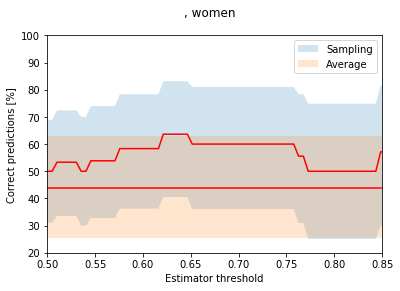

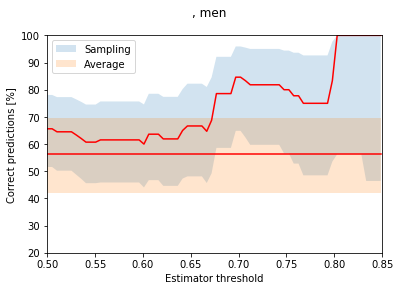

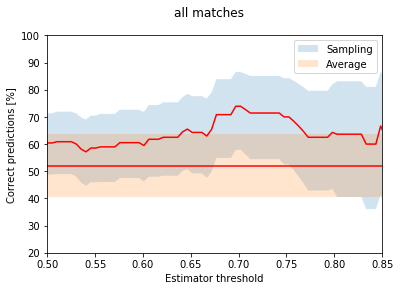

In [65]:
plotthconf(matches_w)
plt.suptitle(', women')
plt.savefig('../FIG/th_pred_w',bbox_inches = 'tight')
plotthconf(matches_m)
plt.suptitle(', men')
plt.savefig('../FIG/th_pred_m',bbox_inches = 'tight')
plotthconf(matches_w+matches_m)
plt.suptitle('all matches')
plt.savefig('../FIG/th_pred_mw',bbox_inches = 'tight')

27.8000785149
0.570756064862
6.89930195398e-07


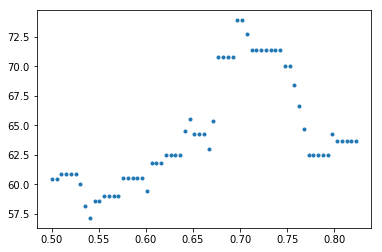

In [92]:
th_val,est,lim1,lim2 = getbinest(matches_w+matches_m,0.9)
from scipy import stats
import numpy as np
num_p = 65 #here we have over 10 matches
x = th_val[:num_p]
y = est[:num_p]
plt.plot(x,y,'.')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope)
print(r_value)
print(p_value)

In [155]:
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.colors as colors
import numpy as np

def getL(res):
    L = 0
    for p in res:
        L = max(L,p[0])
        L = max(L,p[1])
    return L+1


def plotGame(player1,player2,key,n_max):
    res = [el.score for el in gen_Game(player1,player2,key,n_max,MC = True) ]
    res_b = [el[0]>el[1] for el in res ]
    L = getL(res)
    counter = np.zeros((L,L))
    for p in res:
        counter[p[0],p[1]] = counter[p[0],p[1]] + 1


    fig = plt.figure(figsize=(5, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[13, 1])
    ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])  
    img1 = ax.imshow(counter,origin='lower')
    plt.ylabel('{} {:.3} %'.format(player1,100*np.sum(res_b)/len(res) ))
    plt.xlabel('{} {:.3} %'.format(player2,100*(len(res_b)-np.sum(res_b))/len(res)))

    # Make a figure and axes with dimensions as desired.
    cNorm2  = colors.Normalize(vmin=0, vmax=np.max(counter) )
    #ax1 = fig.add_subplot(gs[1])
    ax2 = fig.add_axes([0.85, 0.1, 0.05, 0.7])   
    viridis = cm = plt.get_cmap('viridis') 
    cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=viridis,
                                    norm=cNorm2,
                                    orientation='vertical')

    cb1.set_label('Realizations')
    f_name = player1+'_'+player2+'_'+key
    plt.savefig('../FIG/'+format(f_name.lower().replace(" ", "_")))
    

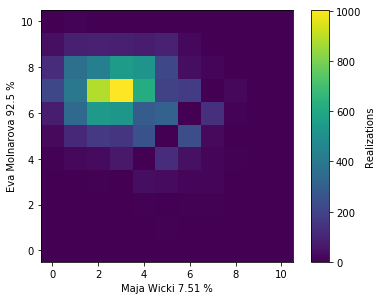

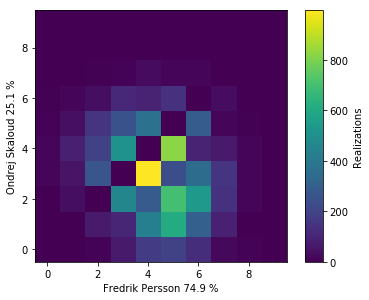

In [156]:
n_iter = 10000
plotGame('Eva Molnarova','Maja Wicki','E1',n_iter)
plotGame('Ondrej Skaloud','Fredrik Persson','E1',n_iter)

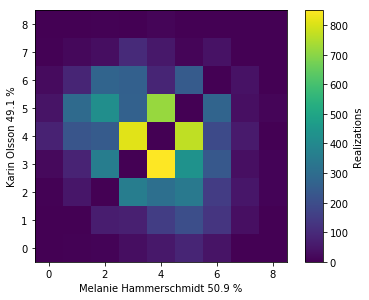

In [157]:
plotGame('Karin Olsson','Melanie Hammerschmidt','E1',n_iter)